In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Roshan Salunke\Downloads\Data Science Course\credit-card-default.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [4]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
defaulted    0
dtype: int64

In [5]:
x = df.drop('defaulted',axis=1)
y = df['defaulted']

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline 
from sklearn.tree import DecisionTreeClassifier

In [8]:
pipeline = make_pipeline(StandardScaler(),
                        DecisionTreeClassifier(random_state=1))
pipeline.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=1))])

In [9]:
pred = pipeline.predict(x_test)

In [10]:
from sklearn import metrics

In [11]:
metrics.accuracy_score(y_test,pred)

0.7275555555555555

In [12]:
pipeline.score(x_test,y_test)
pipeline.score(x_train,y_train)

1.0

In [13]:
pipeline.score(x_test,y_test)

0.7275555555555555

In [14]:
from sklearn.ensemble import BaggingClassifier
bgc = BaggingClassifier(base_estimator=pipeline, random_state=1)
bgc.fit(x_train,y_train)

BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('decisiontreeclassifier',
                                                  DecisionTreeClassifier(random_state=1))]),
                  random_state=1)

In [15]:
pred = bgc.predict(x_test)

In [16]:
bgc.score(x_train,y_train)

0.9790952380952381

In [17]:
bgc.score(x_test,y_test)

0.81

In [18]:
metrics.accuracy_score(y_test,pred)

0.81

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = {
    'base_estimator__max_depth': [1,5,10,15,20],
    'max_samples': [0.05,0.1,0.2,0.5],
    'max_features': [1,5,10,15,20]
}

gs = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(), random_state=1),
                 param_grid,scoring='accuracy')

gs.fit(x_train,y_train)

GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         random_state=1),
             param_grid={'base_estimator__max_depth': [1, 5, 10, 15, 20],
                         'max_features': [1, 5, 10, 15, 20],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]},
             scoring='accuracy')

In [21]:
gs.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  max_features=20, max_samples=0.5, random_state=1)

In [22]:
gs.best_params_

{'base_estimator__max_depth': 5, 'max_features': 20, 'max_samples': 0.5}

In [23]:
gs.best_score_

0.8177619047619048

In [24]:
bgc = BaggingClassifier(DecisionTreeClassifier(max_depth=5), max_features=20,max_samples=0.5)
bgc.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  max_features=20, max_samples=0.5)

In [25]:
bgc.score(x_train,y_train)

0.8237619047619048

In [26]:
bgc.score(x_test,y_test)

0.8275555555555556

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [28]:
pred = rfc.predict(x_test)

In [29]:
metrics.accuracy_score(y_test,pred)

0.8223333333333334

In [30]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      7058
           1       0.66      0.37      0.47      1942

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [31]:
print(metrics.confusion_matrix(y_test,pred))

[[6683  375]
 [1224  718]]


In [32]:
from sklearn.model_selection import KFold
n_folds = 5

parameters = {'max_depth': range(2,20,5)}
rf = RandomForestClassifier(random_state=1)
gs = GridSearchCV(rf,
                 param_grid=parameters,
                 cv=n_folds,
                 scoring='accuracy',
                 return_train_score=True,
                 verbose=1)
gs.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy', verbose=1)

In [33]:
pred = gs.predict(x_test)

In [34]:
metrics.accuracy_score(y_test,pred)

0.8207777777777778

In [35]:
metrics.confusion_matrix(y_test,pred)

array([[6785,  273],
       [1340,  602]], dtype=int64)

In [36]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7058
           1       0.69      0.31      0.43      1942

    accuracy                           0.82      9000
   macro avg       0.76      0.64      0.66      9000
weighted avg       0.80      0.82      0.79      9000



In [37]:
score = gs.cv_results_
score = pd.DataFrame(score)
score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.614593,0.004274,0.022823,0.000363,2,{'max_depth': 2},0.803095,0.803095,0.800476,0.796905,...,0.800905,0.002271,4,0.801190,0.799464,0.801667,0.803333,0.801786,0.801488,0.001242
1,1.548608,0.004434,0.035208,0.000748,7,{'max_depth': 7},0.815238,0.819762,0.818095,0.817857,...,0.817667,0.001455,1,0.831012,0.831071,0.831548,0.833333,0.834107,0.832214,0.001267
2,2.386158,0.008453,0.052411,0.000490,12,{'max_depth': 12},0.813095,0.819286,0.820476,0.814286,...,0.816905,0.002829,2,0.883929,0.886012,0.884345,0.887560,0.885298,0.885429,0.001290
3,2.977303,0.009963,0.066023,0.000012,17,{'max_depth': 17},0.812143,0.815952,0.820000,0.808571,...,0.815190,0.004326,3,0.926845,0.930536,0.931548,0.929524,0.927857,0.929262,0.001716


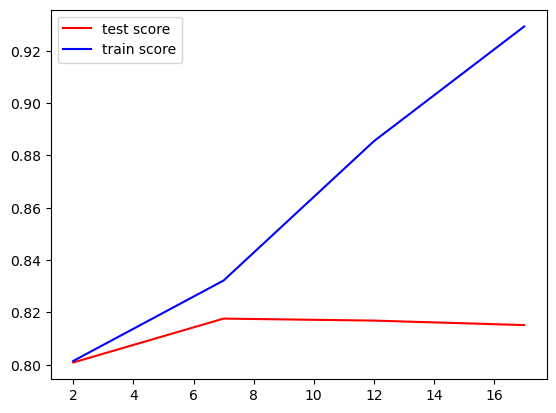

In [38]:
plt.plot(score['param_max_depth'],score['mean_test_score'],color='r',label='test score')
plt.plot(score['param_max_depth'],score['mean_train_score'],color='b',label='train score')
plt.legend()

In [39]:
gs.best_params_

{'max_depth': 7}

In [40]:
parameters = {'n_estimators': range(100,1500,400)}

rf = RandomForestClassifier(max_depth=7,random_state=1)

rf = GridSearchCV(rf,
                  param_grid=parameters,
                  cv=n_folds,
                  scoring='accuracy',
                  return_train_score=True,
                  verbose=1)

rf.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=7, random_state=1),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [41]:
rf.best_params_

{'n_estimators': 1300}

In [42]:
parameters = {
    'max_features': [4,8,14,20,24]
}
rf = RandomForestClassifier(max_depth=7,random_state=1)
rf = GridSearchCV(estimator=rf,
                 param_grid=parameters,
                 cv=n_folds,
                 scoring='accuracy',
                 return_train_score=True,
                 verbose=1)

rf.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=7, random_state=1),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [43]:
rf.best_params_

{'max_features': 20}

In [44]:
parameters = {
    'min_samples_leaf': [100,400,50]
}
rf = RandomForestClassifier(max_depth=7, random_state=1)
rf = GridSearchCV(estimator=rf,
                 param_grid=parameters,
                 cv=n_folds,
                 scoring='accuracy',
                 return_train_score=True,
                 verbose=1)
rf.fit(x_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=7, random_state=1),
             param_grid={'min_samples_leaf': [100, 400, 50]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [45]:
rf.best_params_

{'min_samples_leaf': 100}

In [46]:
parameters = {'min_samples_split': [200,500,50]}

rf = RandomForestClassifier(max_depth=7, random_state=1)

rf = GridSearchCV(estimator=rf,
                 param_grid=parameters,
                 cv=n_folds,
                 scoring='accuracy',
                 return_train_score=True,
                 verbose=1)

rf.fit(x_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=7, random_state=1),
             param_grid={'min_samples_split': [200, 500, 50]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [47]:
rf.best_params_

{'min_samples_split': 50}

In [48]:
rf = RandomForestClassifier(max_depth=7,
                           min_samples_leaf=100,
                           min_samples_split=50,random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=100, min_samples_split=50,
                       random_state=1)

In [49]:
pred = rf.predict(x_test)

In [50]:
metrics.accuracy_score(y_test,pred)

0.8197777777777778

In [51]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100,400,200),
    'min_samples_split': range(200,500,200),
    'n_estimators': [100,200,300],
    'max_features': [5,10]
}
rf = RandomForestClassifier(random_state=1)

rf = RandomizedSearchCV(rf,param_grid,random_state=1)
rf.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': range(100, 400, 200),
                                        'min_samples_split': range(200, 500, 200),
                                        'n_estimators': [100, 200, 300]},
                   random_state=1)

In [52]:
rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 400,
 'min_samples_leaf': 100,
 'max_features': 10,
 'max_depth': 8}

In [53]:
pred = rf.predict(x_test)

In [54]:
metrics.accuracy_score(y_test,pred)

0.8267777777777777

In [55]:
rfc = RandomForestClassifier(n_estimators= 100,
                             min_samples_split= 400,
                             min_samples_leaf= 100,
                             max_features= 10,
                             max_depth= 8)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features=10, min_samples_leaf=100,
                       min_samples_split=400)

In [56]:
pred = rfc.predict(x_test)

In [57]:
metrics.accuracy_score(y_test,pred)

0.8268888888888889

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(random_state=1)

et.fit(x_train,y_train)

ExtraTreesClassifier(random_state=1)

In [59]:
predictions = et.predict(x_test)

In [60]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7058
           1       0.62      0.36      0.45      1942

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



In [61]:
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100,400,200),
    'min_samples_split': range(200,500,200),
    'n_estimators': [100,200,300],
    'max_features': [5,10]
}

rs = RandomizedSearchCV(et, param_grid, random_state=1)

rs.fit(x_train,y_train)

print(f'we can get accuracy {rs.best_score_} using {rs.best_params_}')

we can get accuracy 0.8113333333333334 using {'n_estimators': 100, 'min_samples_split': 400, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': 8}


In [62]:
et = ExtraTreesClassifier(n_estimators=100,
                         min_samples_split=400,
                         min_samples_leaf=100,
                         max_features=10,
                         max_depth=8)
et.fit(x_train,y_train)

ExtraTreesClassifier(max_depth=8, max_features=10, min_samples_leaf=100,
                     min_samples_split=400)

In [63]:
pred = et.predict(x_test)

In [64]:
metrics.accuracy_score(y_test,pred)

0.8161111111111111